Zad. 10
Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) odsetek
odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒
2 w przypadku weryfikacji
zgodności z rozkładem 𝑡-Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z
rozkładu 𝑡-Studenta o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta
o 𝑘 st. swobody. Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
rozmiary testów z uwzględnieniem:
- liczby danych,
- liczby klas,
- liczby stopni swobody generowanego rozkładu.

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parametry
dfs = [i for i in range(1, 11, 1)] # stopnie swobody
SampleSizes = [i for i in range(10, 101, 30)]  # rozmiary próbek
num_bins = [i for i in range(5, 51, 5)]  # liczba klas
simulations_number = 100  # liczba symulacji

# Inicjalizacja wyników
results = []

Inicjalizacja parametrów i potrzebnych zmiennych

In [23]:

for df in dfs:
    for Sample in SampleSizes:
        for bins in num_bins:
            # Inicjalizacja licznika
            chi2_counter = 0

            for _ in range(simulations_number):
                # Generowanie danych
                data = np.random.standard_t(df, size=Sample)

                # Standaryzacja danych
                data = (data - np.mean(data)) / np.std(data)

                # Test chi-kwadrat
                observed_values, _ = np.histogram(data, bins=bins)
                expected_values = np.full(bins, Sample / bins)
                chi2_stat, p_val_chi2 = stats.chisquare(observed_values, expected_values)
                if p_val_chi2 < 0.05:
                    chi2_counter += 1

            # Zapisanie wyników
            results.append([df, Sample, bins, chi2_counter/simulations_number])


In [24]:
# Wyświetlanie wyników
for result in results:
    print(f"Stopnie swobody: {result[0]}, rozmiar próbki: {result[1]}, liczba klas: {result[2]}, odsetek odrzuceń prawdziwej hipotezy głównej: {result[3]}")


Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 5, odsetek odrzuceń prawdziwej hipotezy głównej: 0.61
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 10, odsetek odrzuceń prawdziwej hipotezy głównej: 0.51
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 15, odsetek odrzuceń prawdziwej hipotezy głównej: 0.38
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 20, odsetek odrzuceń prawdziwej hipotezy głównej: 0.45
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 25, odsetek odrzuceń prawdziwej hipotezy głównej: 0.43
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 30, odsetek odrzuceń prawdziwej hipotezy głównej: 0.43
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 35, odsetek odrzuceń prawdziwej hipotezy głównej: 0.38
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 40, odsetek odrzuceń prawdziwej hipotezy głównej: 0.49
Stopnie swobody: 1, rozmiar próbki: 10, liczba klas: 45, odsetek odrzuceń prawdziwej hipotezy głównej: 0.51
Stopnie swobody: 1, rozmiar p

Powyżej tekstowa prezentacja danych

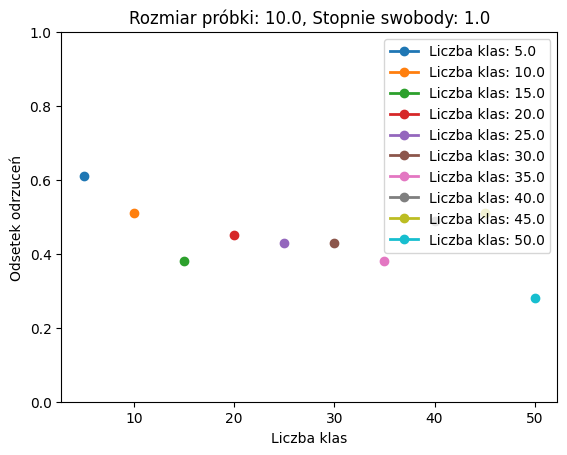

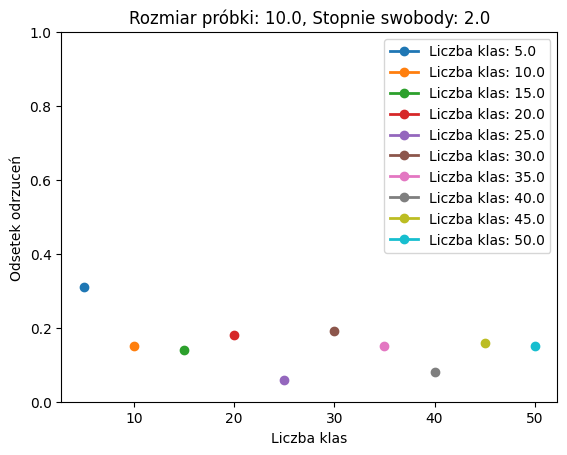

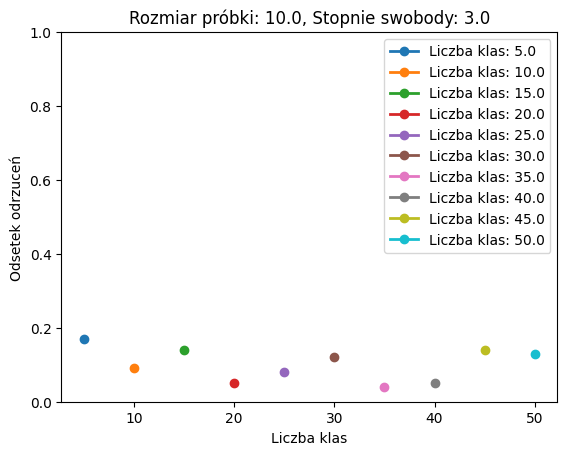

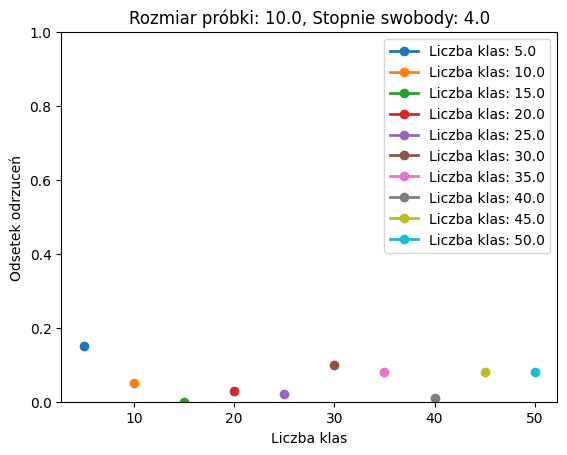

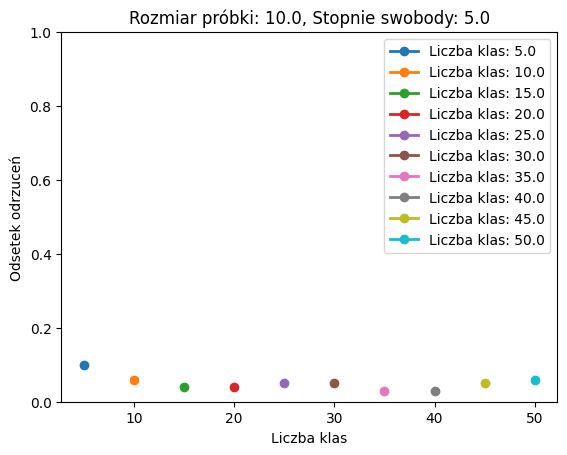

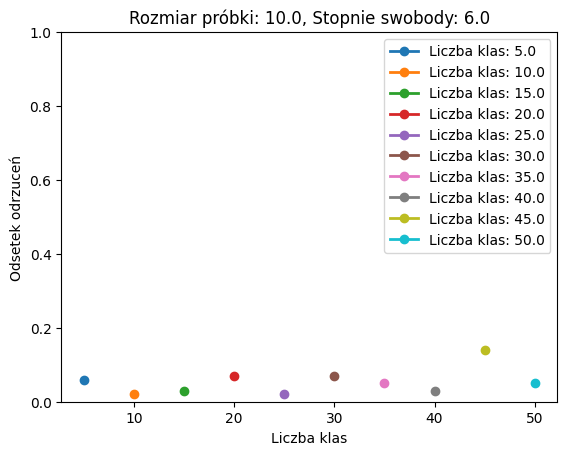

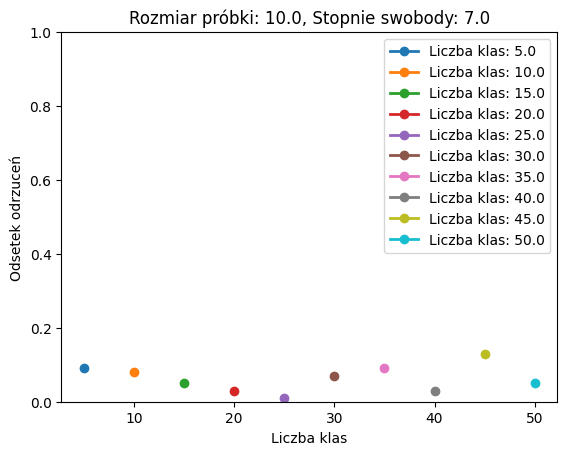

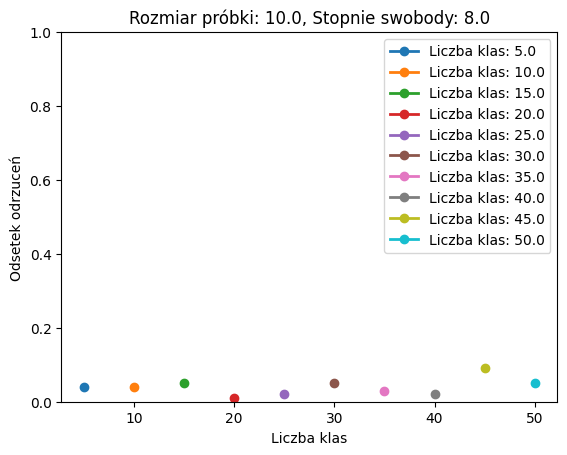

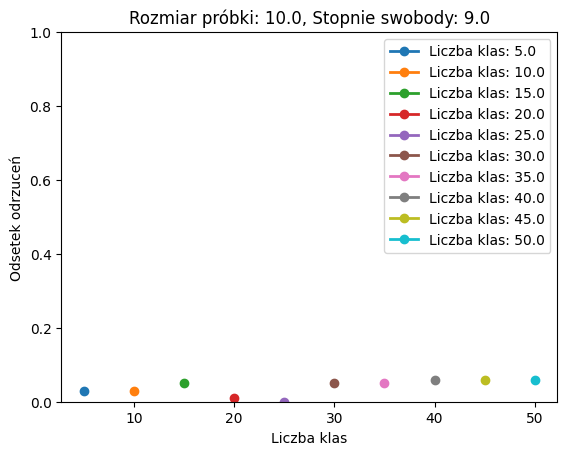

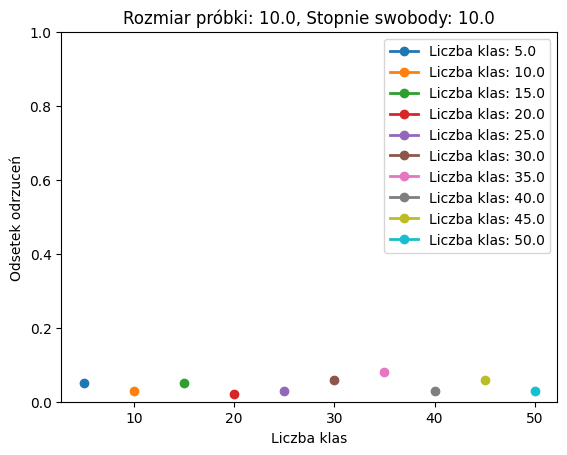

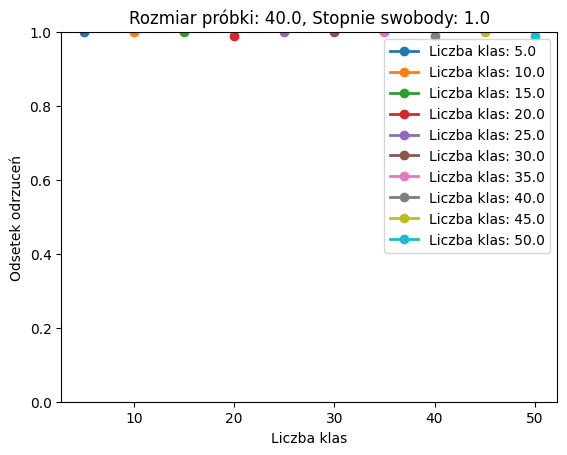

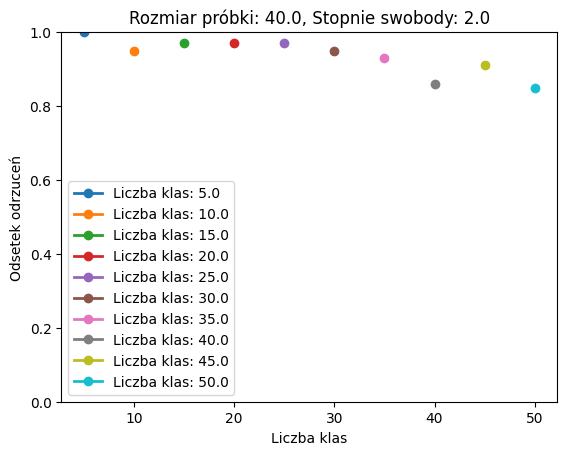

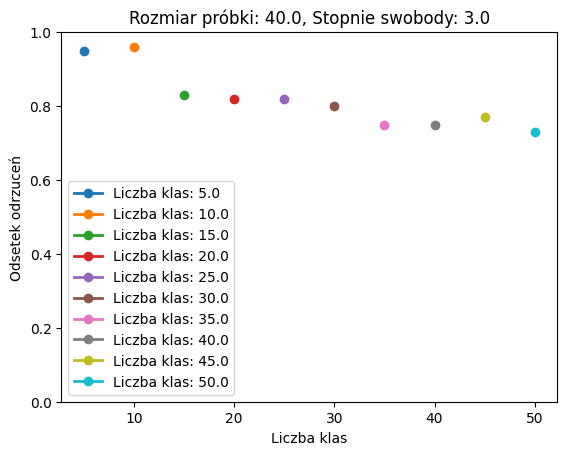

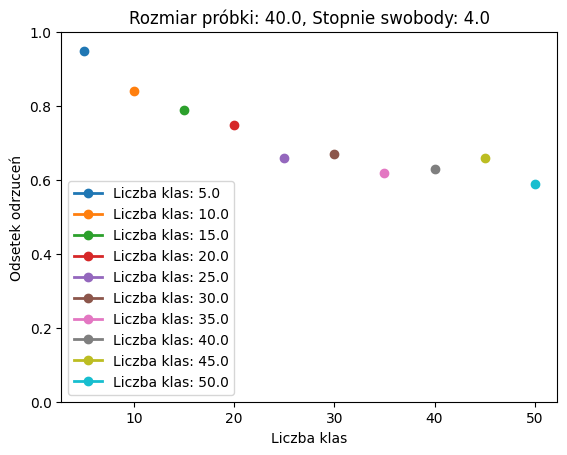

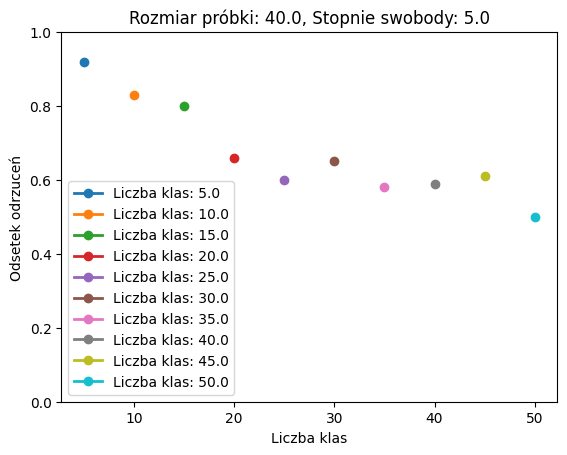

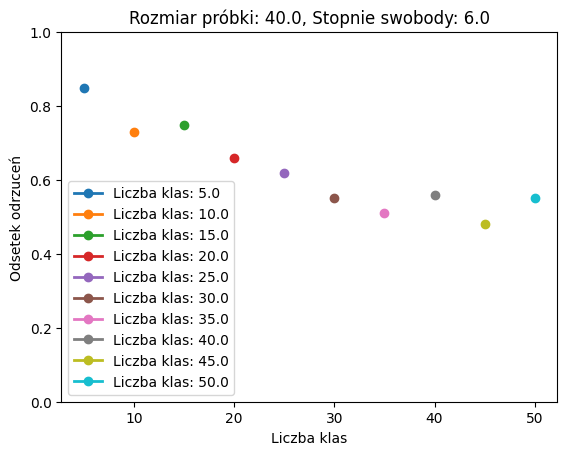

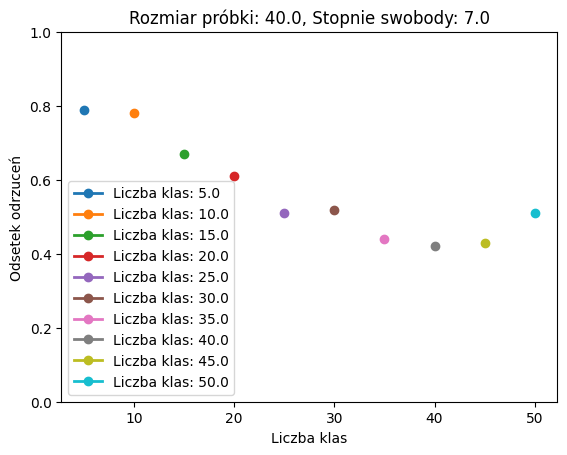

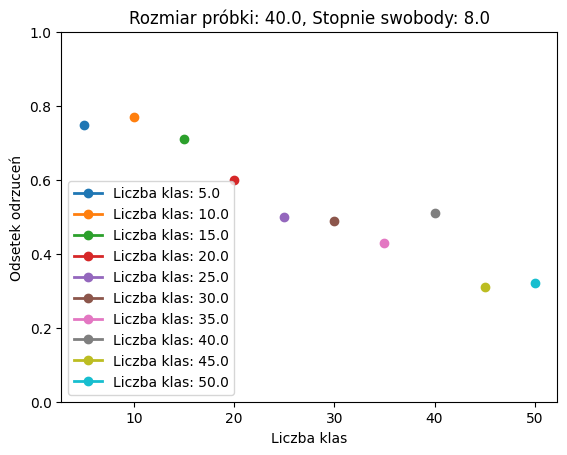

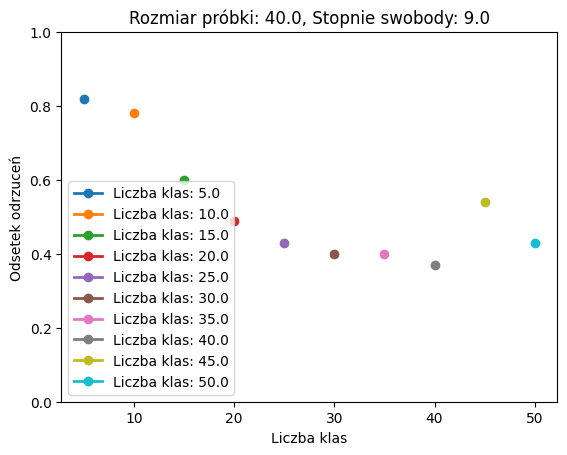

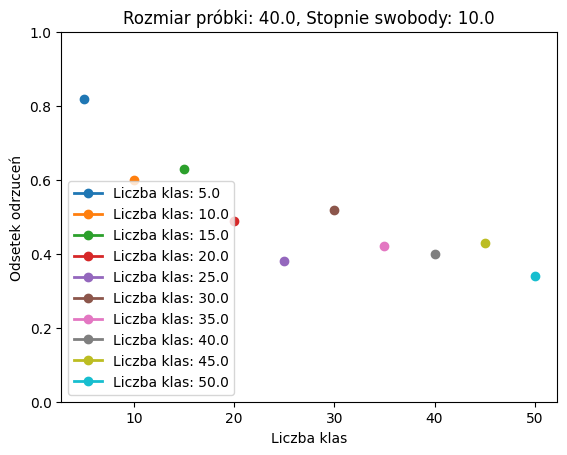

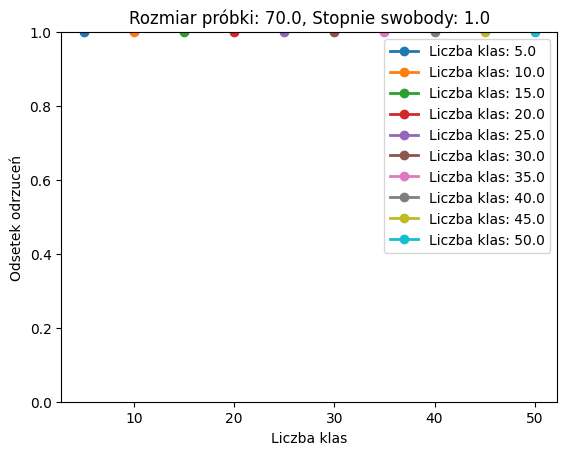

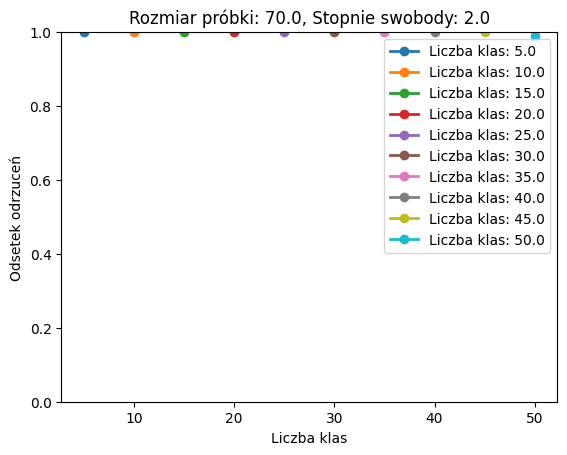

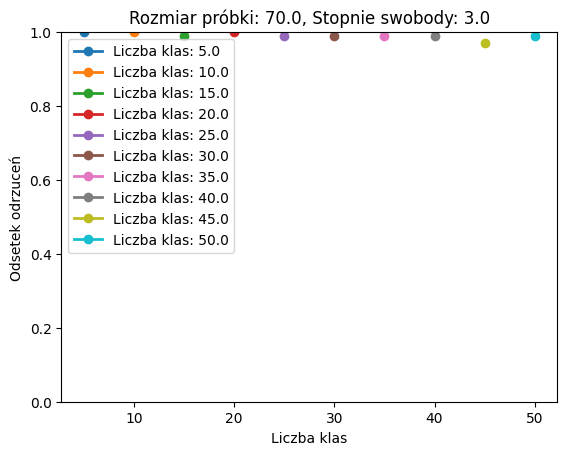

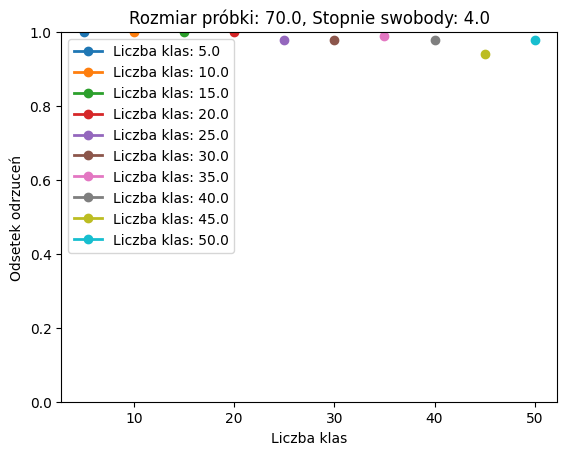

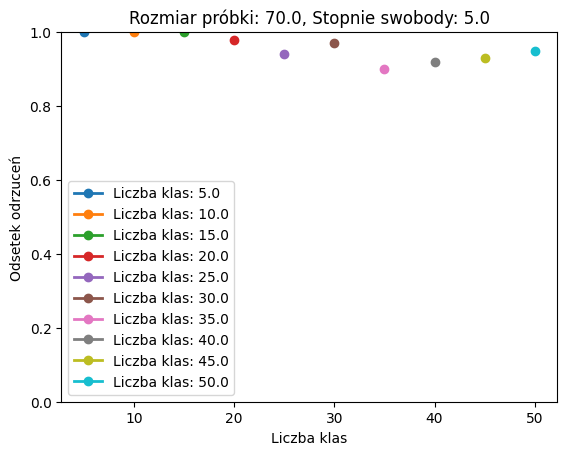

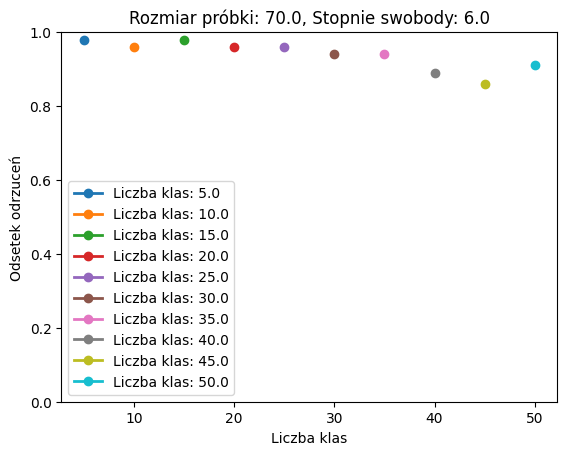

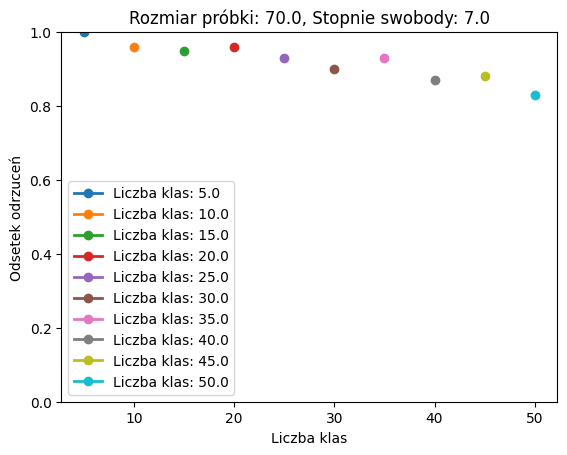

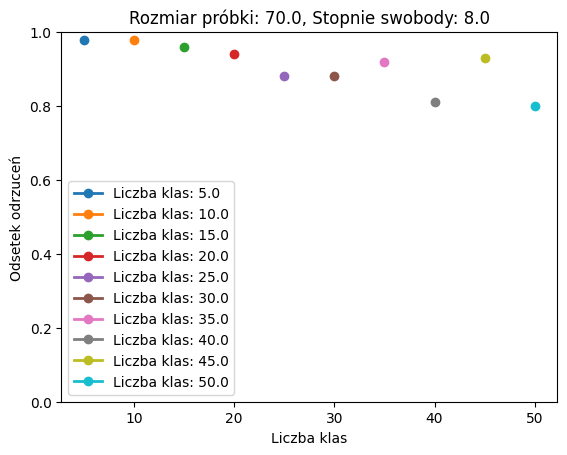

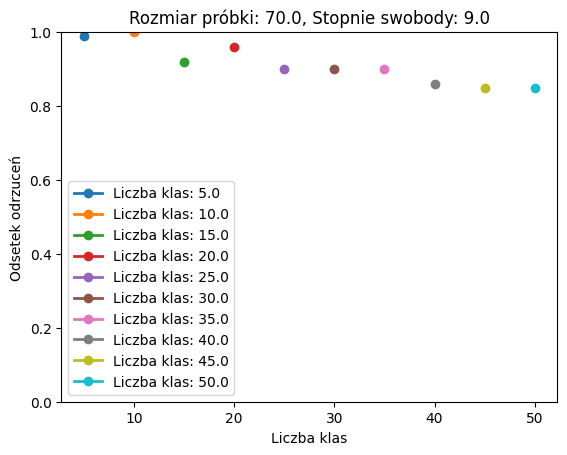

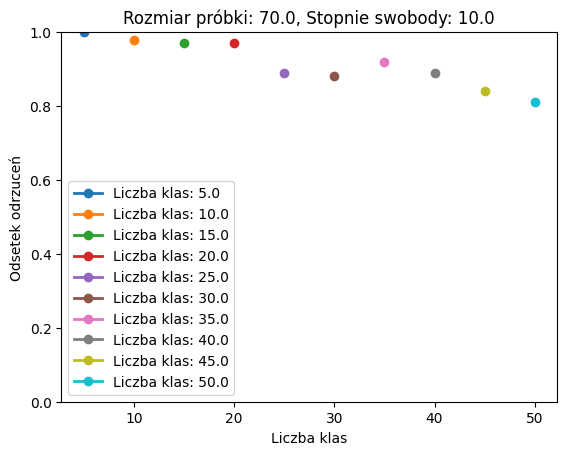

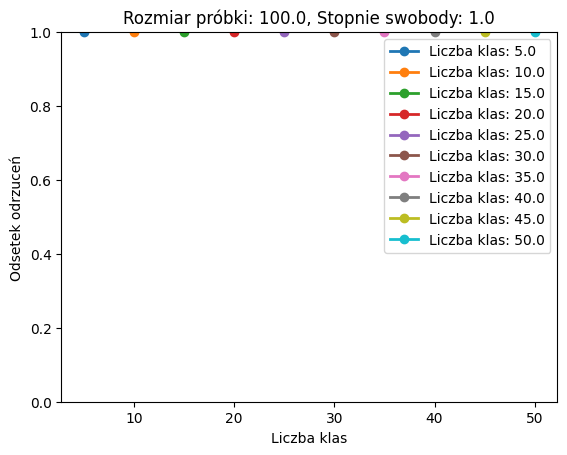

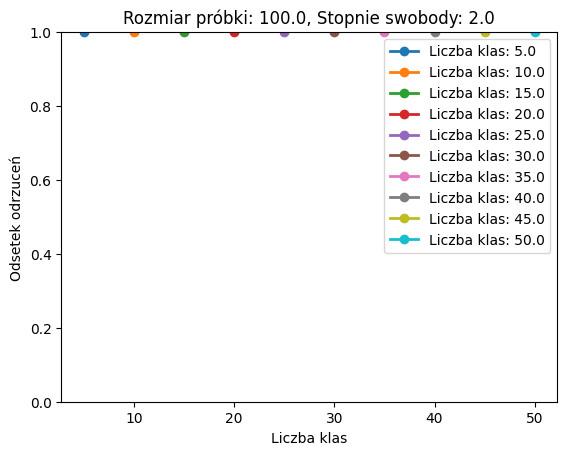

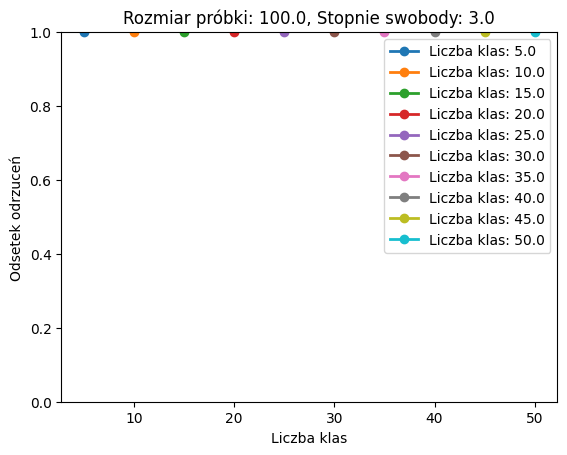

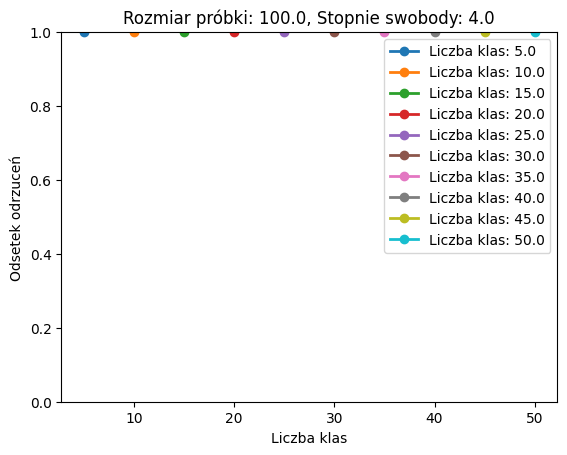

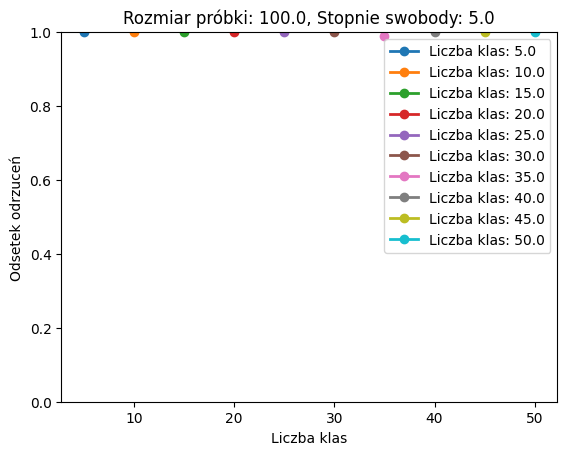

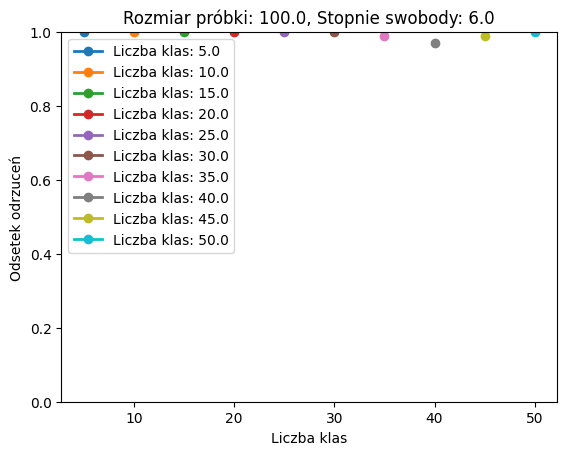

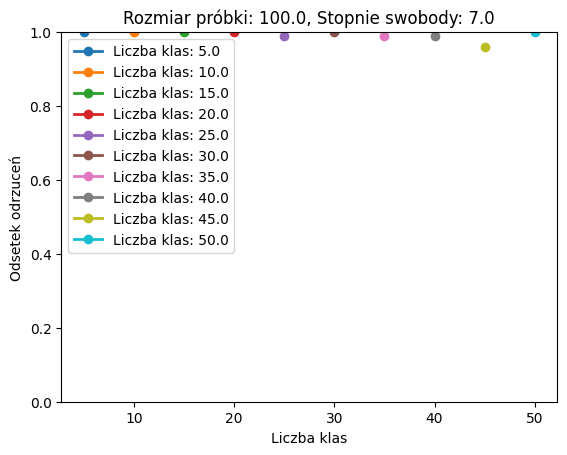

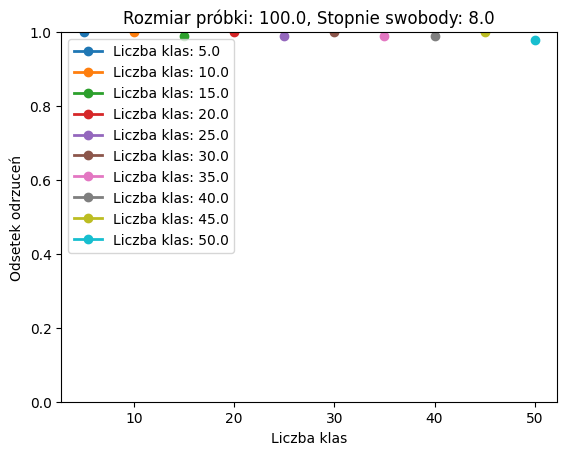

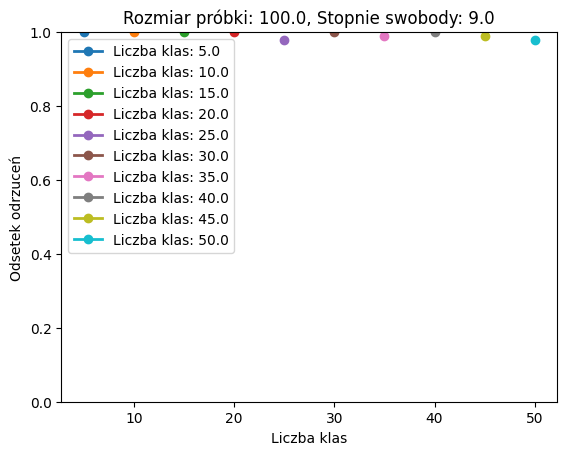

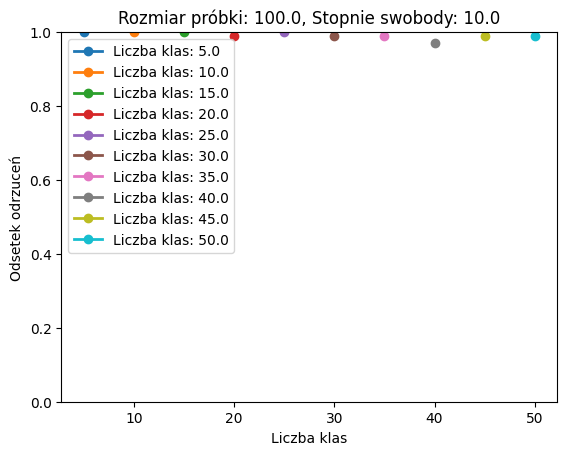

In [25]:
import matplotlib.pyplot as plt
import numpy as np

results_array = np.array(results)

dfs = results_array[:, 0]
samples = results_array[:, 1]
bins = results_array[:, 2]
rejections = results_array[:, 3]

# Wybierz unikalne wartości dla rozmiarów próbek i stopni swobody
unique_samples = np.unique(samples)
unique_dfs = np.unique(dfs)


for sample in unique_samples:
    for df in unique_dfs:

        plt.figure()

        for bin in np.unique(bins):
            mask = (samples == sample) & (dfs == df) & (bins == bin)
            rejections_subset = rejections[mask]
            plt.plot(np.full_like(rejections_subset, bin), rejections_subset, 'o-', label=f'Liczba klas: {bin}', linewidth=2)

        plt.title(f'Rozmiar próbki: {sample}, Stopnie swobody: {df}')
        plt.xlabel('Liczba klas')
        plt.ylabel('Odsetek odrzuceń')
        plt.ylim(0, 1)  
        plt.legend()

        plt.show()


Wnioski i interpretacja:

Można zauważyć, że zarówno stopnie swobody jak i ilość próbek mają wpływ na odestek odrzuceń. Wraz ze zwiększeniem się stopni swobody odsetek odrzuceń drastycznie spada, jednak przy większej ilości danych wpływ stopni swobody jest coraz mniejszy pry ilości próbki równej 100 jest minimalny a odsetek odrzuceń dla każdego stopnia swobody jest bliski 100%. Widzimy, że test chi2 jest wrażliwy na zmiany w ilości próbek (zdaje się być dokładniejszy przy większej próbce). Co ważne w naszej symulacji, wraz ze zwiększeniem liczby klas odsetek odrzuceń maleje, jednak wzrost stopni swobody i ilości danych skutecznie minimalizuje wpływ liczby klas na odsetek odrzuceń hipotezy h0.